In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import pandas as pd
from pathlib import Path
import time
import cv2

In [99]:
def plot_traintracks(pos, target_positions, ax, crossties=False):
    # Plot position of target
    ax.plot(target_positions[0], target_positions[1], c="orange", alpha=0.3, label="target")
    ax.plot(target_positions[0][0], target_positions[1][0], c="orange", alpha=0.3, marker="o")

    # Plot ground truth for pursuer
    ax.plot(pos[0], pos[1], c="b", alpha=0.3, label="pursuer")
    ax.plot(pos[0][0], pos[1][0], c="b", alpha=0.3, marker="o")
    ax.invert_xaxis()
    print(pos.shape)
    if crossties:
        for xtie_ind in np.arange(0, len(pos[0]), 3):
            ax.plot(
                [pos[0][xtie_ind], target_positions[0][xtie_ind]],
                [pos[1][xtie_ind], target_positions[1][xtie_ind]],
                c="k", alpha=0.3)

In [150]:
video_file = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-18_SC22/3-18_SC22.avi')
df = pd.read_pickle('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-19_trajectory_analysis/03-18_SC22_trial3.pkl')
end_timestamp = 1710819720.36219    # 3-18_SC22
# end_timestamp = 1710821180.7162201    # 3-18_SC23
start_time_ = 15, 30
end_time_ = 15, 39
output_dir = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-19_clips_movies')

video = cv2.VideoCapture(str(video_file))
frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
frame_rate = video.get(cv2.CAP_PROP_FPS)
duration = frame_count / frame_rate
start_timestamp = end_timestamp - duration
chip_pos = np.concatenate((df['chip_est_x'].to_numpy().reshape(-1, 1), df['chip_est_y'].to_numpy().reshape(-1, 1)), axis=1).astype(int)
mouse_pos = np.concatenate((df['mouse_raw_x'].to_numpy().reshape(-1, 1), df['mouse_raw_y'].to_numpy().reshape(-1, 1)), axis=1).astype(int)
unix_timestamps = df['datetime'].apply(lambda x: time.mktime(x.timetuple()) + x.microsecond / 1e6).to_numpy() - start_timestamp
print(unix_timestamps)

# convert start and end time to unix timestamp
start_time = start_time_[0] * 60 + start_time_[1]
end_time = end_time_[0] * 60 + end_time_[1]
print(start_time, end_time)

start_index = np.searchsorted(unix_timestamps, start_time)
end_index = np.searchsorted(unix_timestamps, end_time)

print(start_index, end_index)

[ 696.01727629  696.06266427  696.10797238 ... 1209.17089629 1209.21600437
 1209.26112533]
930 939
4859 5047


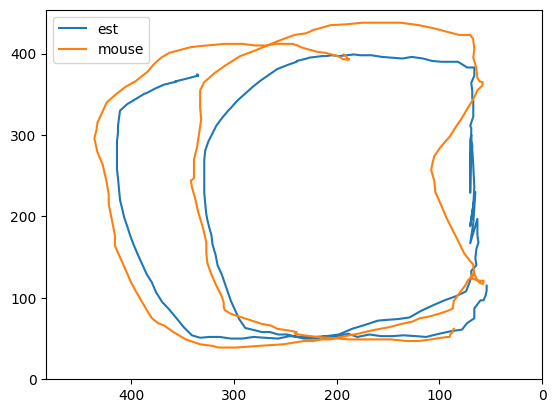

In [101]:
plt.plot(chip_pos[start_index:end_index, 0], chip_pos[start_index:end_index, 1], label='est')
plt.plot(mouse_pos[start_index:end_index, 0], mouse_pos[start_index:end_index, 1], label='mouse')
plt.xlim(0, 483)
plt.ylim(0, 454)
plt.gca().invert_xaxis()
plt.legend()

(2, 188)


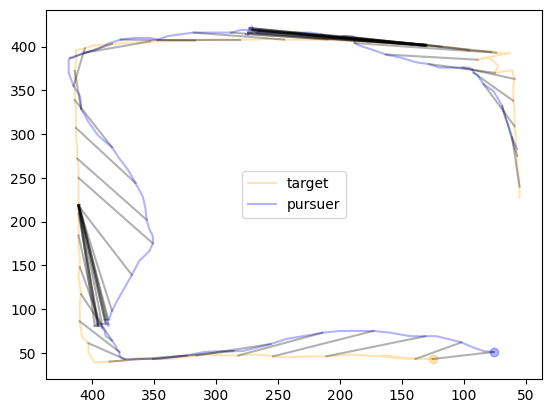

In [152]:
fig, ax = plt.subplots()
plot_traintracks(mouse_pos[start_index:end_index].T, chip_pos[start_index:end_index].T, ax, crossties=True)
ax.legend()

In [153]:
fig.savefig(output_dir / f'{video_file.stem}_{start_time_[0]}.{start_time_[1]}-{end_time_[0]}.{end_time_[1]}.png')